## Team : Intern Techno
We have used Google colab, so our file path names will be according to that.

In [1]:
import numpy as np
def load_numpy_array_from_file(filename):
    array = np.load(filename)
    return array

In [2]:
clock_array = load_numpy_array_from_file("/content/alarm clock.npy")#0
angel_array = load_numpy_array_from_file("/content/angel.npy")#1
apple_array = load_numpy_array_from_file("/content/apple.npy")#2
arm_array = load_numpy_array_from_file("/content/arm.npy")#3
baseball_bat_array = load_numpy_array_from_file("/content/baseball bat.npy")#4
baseball_array = load_numpy_array_from_file("/content/baseball.npy")#5
bed_array = load_numpy_array_from_file("/content/bed.npy")#6
book_array = load_numpy_array_from_file("/content/book.npy")#7
cake_array = load_numpy_array_from_file("/content/cake.npy")#8
face_array = load_numpy_array_from_file("/content/face.npy")#9

In [3]:
print(clock_array.shape)
print(angel_array.shape)
print(apple_array.shape)
print(arm_array.shape)
print(baseball_bat_array.shape)
print(baseball_array.shape)
print(bed_array.shape)
print(book_array.shape)
print(cake_array.shape)
print(face_array.shape)

(10000, 784)
(10000, 784)
(10000, 784)
(10000, 784)
(10000, 784)
(10000, 784)
(10000, 784)
(10000, 784)
(10000, 784)
(10000, 784)


In [4]:
#Now reshaping each numpy array
clock_array = clock_array.reshape(clock_array.shape[0], 28, 28, 1)
angel_array = angel_array.reshape(angel_array.shape[0], 28, 28, 1)
apple_array = apple_array.reshape(apple_array.shape[0], 28, 28, 1)
arm_array = arm_array.reshape(arm_array.shape[0], 28, 28, 1)
baseball_bat_array = baseball_bat_array.reshape(baseball_bat_array.shape[0], 28, 28, 1)
baseball_array = baseball_array.reshape(baseball_array.shape[0], 28, 28, 1)
bed_array = bed_array.reshape(bed_array.shape[0], 28, 28, 1) 
book_array = book_array.reshape(book_array.shape[0], 28, 28, 1)
cake_array = cake_array.reshape(cake_array.shape[0], 28, 28, 1)
face_array = face_array.reshape(face_array.shape[0], 28, 28, 1)

In [5]:
classes=["clock","angel","apple","arm","baseball_bat","baseball","bed","book","cake","face"]
train_data = np.concatenate((clock_array, angel_array , apple_array, arm_array, baseball_bat_array, baseball_array, bed_array, book_array, cake_array, face_array), axis=0)
train_data = train_data.astype('float32')
train_data /= 255.0
train_data.shape

(100000, 28, 28, 1)

In [6]:
#Now creating labels for our data
train_labels_list = [np.full((10000,), i) for i in range(10)]
train_labels = np.concatenate(train_labels_list)


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=10)

In [8]:
#Now splitting our Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [9]:
#Now for faster training we will convert our numpy arrays into tensors
import tensorflow as tf
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)

In [10]:
#Making the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu",input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
#Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Getting the summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [13]:
checkpoint_path = "InternTechno_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True) # only keep the best model weights on file (delete the rest)

In [15]:
#Fitting the model
history = model.fit(x_train,y_train, epochs=10,validation_data=(x_test, y_test),callbacks=[checkpoint_callback])

Epoch 1/10
2500/2500 [==============================] - 26s 5ms/step - loss: 0.5462 - accuracy: 0.8303 - val_loss: 0.3592 - val_accuracy: 0.8916
Epoch 2/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.3257 - accuracy: 0.9004 - val_loss: 0.3350 - val_accuracy: 0.8975
Epoch 3/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.2725 - accuracy: 0.9159 - val_loss: 0.2794 - val_accuracy: 0.9148
Epoch 4/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2345 - accuracy: 0.9275 - val_loss: 0.2714 - val_accuracy: 0.9161
Epoch 5/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.2099 - accuracy: 0.9344 - val_loss: 0.2730 - val_accuracy: 0.9200
Epoch 6/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.1872 - accuracy: 0.9405 - val_loss: 0.2692 - val_accuracy: 0.9213
Epoch 7/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.1687 - accuracy: 0.9467 - val_loss: 0.2709 - val_ac

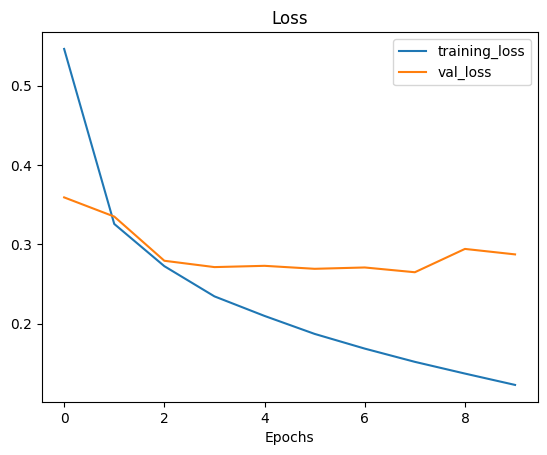

In [16]:
#Now we'll plot the loss graph for training and testing data
import matplotlib.pyplot as plt
epochs = range(len(history.history['loss']))
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

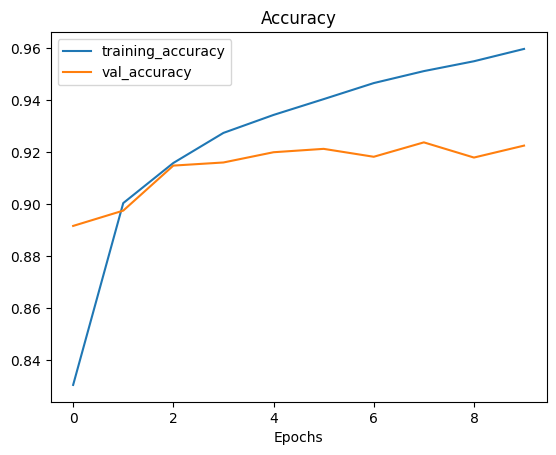

In [17]:
#Now we'll plot the accuracy graph for training and testing data
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();

In [18]:
#Saving the model
model.save("InternTechno_Model.h5")